In [43]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
multi_root = 'KEV_res/multi/'# mu =0.0/'
iter_root = 'KEV_res/iter/' #mu =0.0/'

flows = 'flows/'
corrs = 'corr_matrix/'
times = 'times/'

In [45]:
n = 10000
mu = 0

f = []
c = []
t = []
f_n_k = []
c_n_k = []
t_n_k = []

flow_n = np.loadtxt(multi_root + flows + str(n-1) + '_flows.txt', 
                          delimiter = ' ')
time_n = np.loadtxt(multi_root + times + str(n-1) + '_time.txt', 
                          delimiter = ' ')
c_n = np.loadtxt(multi_root + corrs + str(n-1) + '_corr_matrix.txt', 
                          delimiter = ' ')

#### MULTI

In [46]:
for ms_i in range(n):
    if ms_i == 0:
        flow_0 = np.loadtxt(multi_root + flows + str(ms_i) + '_flows.txt', 
                          delimiter = ' ')
        time_0 = np.loadtxt(multi_root + times + str(ms_i) + '_time.txt', 
                          delimiter = ' ')
        corr_0 = np.loadtxt(multi_root + corrs + str(ms_i) + '_corr_matrix.txt', 
                          delimiter = ' ')
        
        f_n_k.append(np.linalg.norm(flow_n - flow_0))
        t_n_k.append(np.linalg.norm(time_n - time_0))
        c_n_k.append(np.linalg.norm(c_n - corr_0))
    else:
        flow = np.loadtxt(multi_root + flows + str(ms_i) + '_flows.txt', 
                          delimiter = ' ')
        time = np.loadtxt(multi_root + times + str(ms_i) + '_time.txt', 
                          delimiter = ' ')
        corr = np.loadtxt(multi_root + corrs + str(ms_i) + '_corr_matrix.txt', 
                          delimiter = ' ')
        
        f.append(np.linalg.norm(flow - flow_0))
        t.append(np.linalg.norm(time - time_0))
        c.append(np.linalg.norm(corr - corr_0))
        
        flow_0 = flow
        time_0 = time
        corr_0 = corr
        
        f_n_k.append(np.linalg.norm(flow_n - flow_0))
        t_n_k.append(np.linalg.norm(time_n - time_0))
        c_n_k.append(np.linalg.norm(c_n - corr_0))

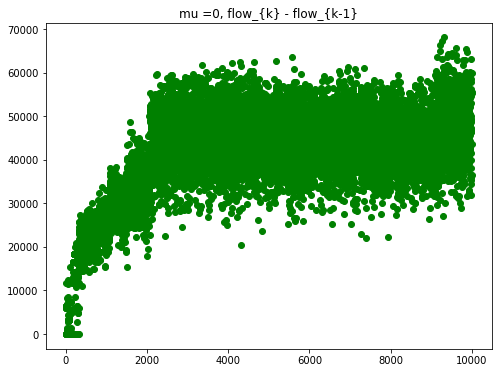

In [47]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 50)
# plt.xlim(0, 250)
plt.plot(f, 'o', color='green')
plt.title('mu =' + str(mu) + ', ' + 'flow_{k} - flow_{k-1}')
plt.savefig(multi_root + 'flow_{k} - flow_{k-1}.png')

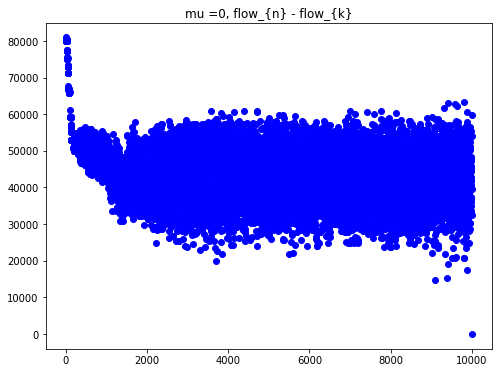

In [48]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 150)
plt.plot(f_n_k, 'o', color='blue')
plt.title('mu =' + str(mu) + ', ' + 'flow_{n} - flow_{k}')
plt.savefig(multi_root + 'flow_{n} - flow_{k}.png')

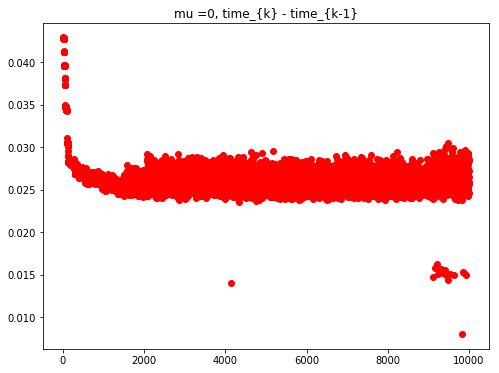

In [49]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.xlim(999)
# plt.ylim(0, 35000)
plt.plot(t, 'o', color='red')
plt.title('mu =' + str(mu) + ', ' + 'time_{k} - time_{k-1}')
plt.savefig(multi_root + 'time_{k} - time_{k-1}.png')

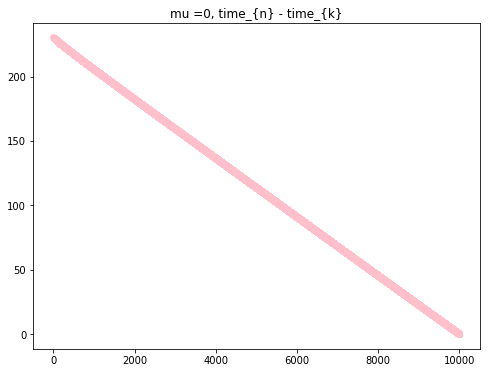

In [50]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 1)
plt.plot(t_n_k, 'o', color='pink')
plt.title('mu =' + str(mu) + ', ' + 'time_{n} - time_{k}')
plt.savefig(multi_root + 'time_{n} - time_{k}.png')

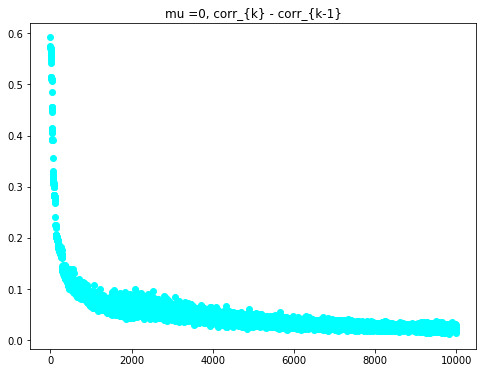

In [51]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 2)
# plt.ylim(67000, 62500)
plt.plot(c, 'o', color='cyan')
plt.title('mu =' + str(mu) + ', ' + 'corr_{k} - corr_{k-1}')
plt.savefig(multi_root + 'corr_{k} - corr_{k-1}.png')

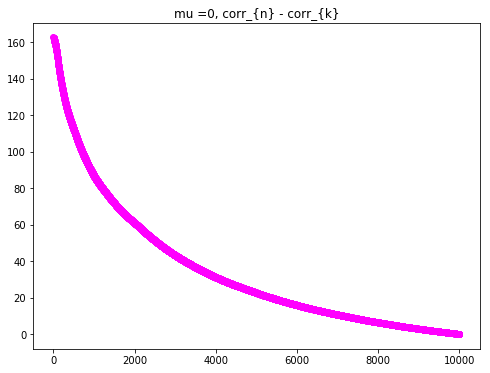

In [52]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 200)
plt.plot(c_n_k, 'o', color='magenta')
plt.title('mu =' + str(mu) + ', ' + 'corr_{n} - corr_{k}')
plt.savefig(multi_root + 'corr_{n} - corr_{k}.png')

#### ITERATION

In [18]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

multi_root = 'KEV_res/multi/'# mu =0.0/'
iter_root = 'KEV_res/iter/' #mu =0.0/'

flows = 'flows/'
corrs = 'corr_matrix/'
times = 'times/'

In [19]:
n = 100
mu = 0.25

f = []
c = []
t = []
f_n_k = []
c_n_k = []
t_n_k = []

flow_n = np.loadtxt(iter_root + flows + str(n-1) + '_flows.txt', 
                          delimiter = ' ')
time_n = np.loadtxt(iter_root + times + str(n-1) + '_time.txt', 
                          delimiter = ' ')
corr_n = np.loadtxt(iter_root + corrs + str(n-1) + '_corr_matrix.txt', 
                          delimiter = ' ')

for ms_i in range(0, n):
    if ms_i == 0:
        flow_0 = np.loadtxt(iter_root + flows + str(ms_i) + '_flows.txt', 
                          delimiter = ' ')
        time_0 = np.loadtxt(iter_root + times + str(ms_i) + '_time.txt', 
                          delimiter = ' ')
        corr_0 = np.loadtxt(iter_root + corrs + str(ms_i) + '_corr_matrix.txt', 
                          delimiter = ' ')
        
        f_n_k.append(np.linalg.norm(flow_n - flow_0))
        t_n_k.append(np.linalg.norm(time_n - time_0))
        c_n_k.append(np.linalg.norm(corr_n - corr_0))
    else:
        flow = np.loadtxt(iter_root + flows + str(ms_i) + '_flows.txt', 
                          delimiter = ' ')
        time = np.loadtxt(iter_root + times + str(ms_i) + '_time.txt', 
                          delimiter = ' ')
        corr = np.loadtxt(iter_root + corrs + str(ms_i) + '_corr_matrix.txt', 
                          delimiter = ' ')
        
        f.append(np.linalg.norm(flow - flow_0))
        t.append(np.linalg.norm(time - time_0))
        c.append(np.linalg.norm(corr - corr_0))
        
        flow_0 = flow
        time_0 = time
        
        f_n_k.append(np.linalg.norm(flow_n - flow))
        t_n_k.append(np.linalg.norm(time_n - time))
        c_n_k.append(np.linalg.norm(corr_n - corr))

In [20]:
t, f

([44.195549109592086,
  52.469434352832145,
  78.17067563491138,
  122.32371357311685,
  164.12311008366777,
  235.35759524394388,
  377.7007724388592,
  469.50163013840535,
  688.9900655149778,
  986.3021266328186,
  1124.9218495502294,
  1817.943522033319,
  2509.1224565564366,
  3235.4727832987146,
  4096.688223976861,
  5156.575918112922,
  7436.727730331249,
  9327.162953432788,
  12054.559578814778,
  16644.0843389918,
  24063.273864769784,
  33433.799073716196,
  37270.838521714315,
  50891.99732639178,
  57769.66277005158,
  71501.25917403057,
  103931.79808353311,
  149711.1874419206,
  186424.55308123215,
  217647.68152037388,
  288782.2907562844,
  372900.71529223945,
  458587.38434874726,
  646785.0661772772,
  833621.3721596986,
  1040313.126047052,
  1292947.1670867167,
  1676267.4489130026,
  2201950.690623062,
  2961904.5155594465,
  3956850.4273882364,
  4753010.128306998,
  5682515.378774522,
  7527979.850464353,
  10287743.578544369,
  14648224.780276846,
  15631569.

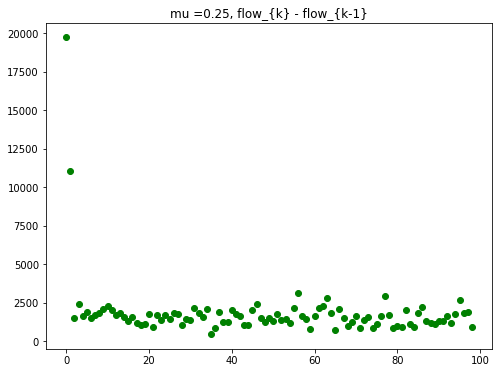

In [21]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(4000, 6000)
plt.plot(f, 'o', color='green')
plt.title('mu =' + str(mu) + ', ' 'flow_{k} - flow_{k-1}')
plt.savefig(iter_root + 'flow_{k} - flow_{k-1}.png')

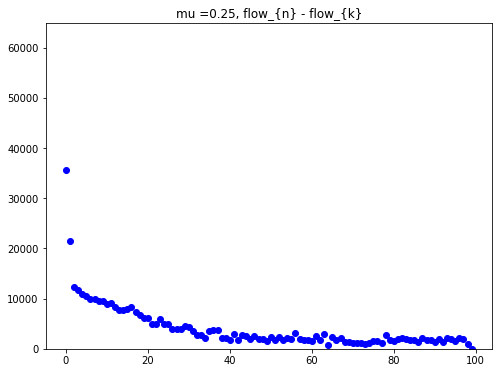

In [22]:
w = 8
h = 6
plt.figure(figsize=(w, h))
plt.ylim(0, 65000)
plt.plot(f_n_k, 'o', color='blue')
plt.title('mu =' + str(mu) + ', ' 'flow_{n} - flow_{k}')
plt.savefig(iter_root + 'flow_{n} - flow_{k}.png')

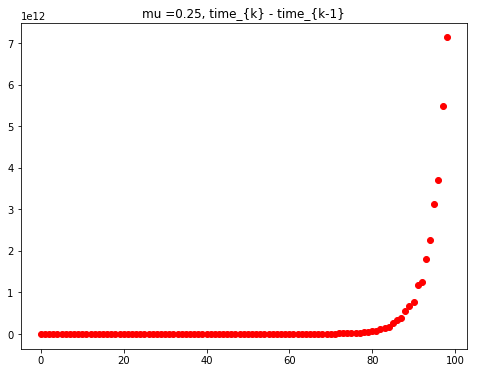

In [23]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.xlim(999)
# plt.ylim(0, 35000)
plt.plot(t, 'o', color='red')
plt.title('mu =' + str(mu) + ', ' 'time_{k} - time_{k-1}')
plt.savefig(iter_root + 'time_{k} - time_{k-1}.png')

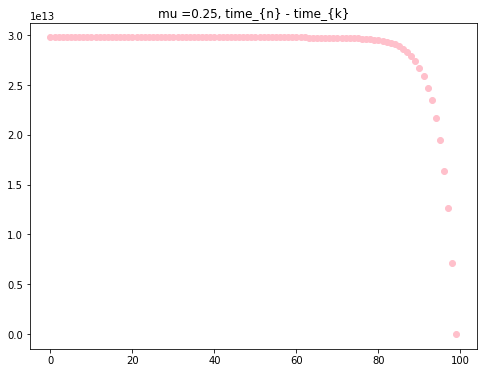

In [24]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
plt.plot(t_n_k, 'o', color='pink')
plt.title('mu =' + str(mu) + ', ' 'time_{n} - time_{k}')
plt.savefig(iter_root + 'time_{n} - time_{k}.png')

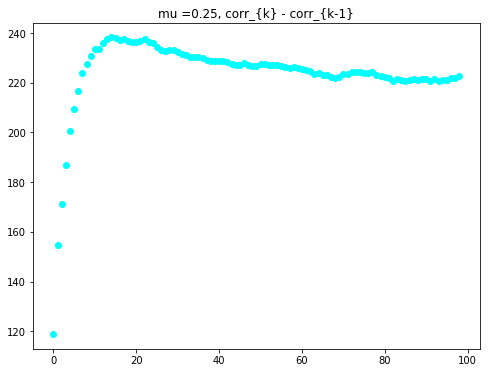

In [25]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 2)
# plt.ylim(67000, 62500)
plt.plot(c, 'o', color='cyan')
plt.title('mu =' + str(mu) + ', ' + 'corr_{k} - corr_{k-1}')
plt.savefig(iter_root + 'corr_{k} - corr_{k-1}.png')

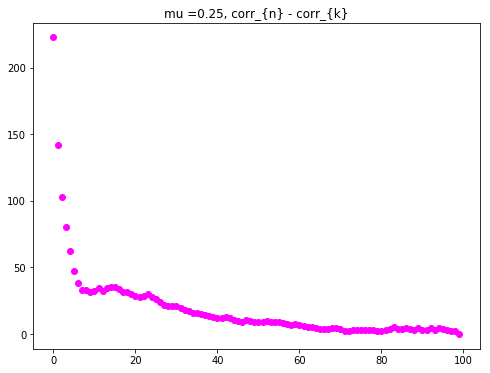

In [26]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 200)
plt.plot(c_n_k, 'o', color='magenta')
plt.title('mu =' + str(mu) + ', ' + 'corr_{n} - corr_{k}')
plt.savefig(iter_root + 'corr_{n} - corr_{k}.png')